In [2]:
#TODO: compare time series of large sale to time series of next auction's sales
#TODO: locations
#TODO: regressions, scikit
#TODO: plotly, can explore more
#TODO: standardize date-times with currency exchange rates

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
art_df = pd.read_csv('fina_artframe_2007-2017.csv')
art_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
0,132563,PAUL HUXLEY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,UNTITLED NO. 33,13181,4,10,2011,14981.03
1,132564,WILLIAM SCOTT,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,60000,AMSTERDAM,40000,CIRCLES DIMINISHING,57930,4,10,2011,65841.06
2,132565,BERNARD COHEN,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,WHEN WHITE,23066,4,10,2011,26215.95
3,132566,ANTONY DONALDSON,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,3000,AMSTERDAM,2000,BRING IT TO JEROME,35786,4,10,2011,40673.02
4,132567,ROBYN DENNY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,FOR EVER,10709,4,10,2011,12171.45


In [5]:
#Creating 5% sample from the dataframe
art_df_sample = art_df.sample(8700)
art_df_sample


,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
30813,34072,RUDOLF MARCUSE,19th and 20th century sculpture,L16230,GBP,25-May-16,5000,LONDON,3000,TÄNZERIN (DANCER),0,25,5,2016,0.00
94628,20342,ALEXANDRE CABANEL,master paintings and 19th century european art,N09600,USD,27-Jan-17,25000,NEW YORK,18000,"PORTRAIT OF MISS MATTHEWS, IN GREEN SILK SATIN...",0,27,1,2017,0.00
18013,201456,LU YANSHAO 1909-1993,sotheby's | auctions - fine chinese paintings,HK0265,HKD,8-Apr-08,900000,HONG KONG,700000,LANDSCAPE OF MOUNT TIANTAI,201206,8,4,2008,238918.76
93309,15467,SYBIL ANDREWS,prints & multiples,N09645,USD,27-Apr-17,12000,NEW YORK,8000,STORM (C. SA 34),8125,27,4,2017,8474.30
106483,58922,PABLO PICASSO,prints & multiples,N09332,USD,1-May-15,7000,NEW YORK,5000,CRUCHON HIBOU (A.R. 293),13750,1,5,2015,14831.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149720,184642,ALBRECHT DÜRER,sotheby's | auctions - prints,N08483,USD,30-Oct-08,5000,NEW YORK,3000,"THE PRODIGAL SON (B., M., HOLL. 28)",0,30,10,2008,0.00
166333,104202,JIM DINE,"sotheby's | auctions - coll buchet,prints",PF1334,EUR,25-Feb-13,2200,PARIS,1600,"1 - NANCY OUTSIDE IN JULY XIX, THE FISH IN THE...",1995,25,2,2013,2189.40
62732,139426,VLASSIS CANIARIS,sotheby's | auctions - the greek sale,L11100,GBP,9-May-11,20000,LONDON,15000,CONSERVATION,30701,9,5,2011,34893.60
93874,16546,ROBERT HEINECKEN,photographs,N09640,USD,5-Apr-17,9000,NEW YORK,6000,"'SOCIO-DUO-HABLIMENT STUDIES' (#1, #2 AND #3)",7500,5,4,2017,7822.43


In [6]:
#finding currencies:
currencies = art_df['currency'].unique()

#separating currencies into their own dataframes
currency_dataframes = {}
for currency in currencies:
    currency_dataframes[currency] = art_df.loc[art_df['currency'] == currency]
currency_dataframes.keys()

usd_df = currency_dataframes['USD']
usd_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price
3415,59740,WAEL SHAWKY,contemporary art / doha,DO1501,USD,21-Apr-15,70000,DOHA,50000,THE CAVE: AMSTERDAM,0,21,4,2015,0.00
3416,59741,AHMED MATER,contemporary art / doha,DO1501,USD,21-Apr-15,20000,DOHA,15000,GREEN ANTENNA,22500,21,4,2015,24269.53
3417,59742,CHANT AVEDISSIAN,contemporary art / doha,DO1501,USD,21-Apr-15,250000,DOHA,180000,ICONS OF THE NILE,0,21,4,2015,0.00
3418,59743,KOUR POUR,contemporary art / doha,DO1501,USD,21-Apr-15,90000,DOHA,70000,LOVE CHILD,162500,21,4,2015,175279.96
3419,59744,ALI BANISADR,contemporary art / doha,DO1501,USD,21-Apr-15,150000,DOHA,100000,THE SHRINE,237500,21,4,2015,256178.40


In [7]:
#removing rows that didn't sell
usd_df_sales = usd_df[usd_df['adj_sale_price'] != 0]

#plotting month against the value of the sales
#plt.bar(usd_df_sales['month'], usd_df_sales['adj_sale_price'])


In [8]:
#adding new row describing region
regions = []
americas = ("NEW YORK", "TORONTO")
europe = ("AMSTERDAM", "GENEVA", "LONDON", "MILAN", "PARIS", "ZURICH")
mideast = ("DOHA", "DUBAI")
oceania = ("MELBOURNE", "SYDNEY")

for location in art_df['location']:
    if location in (americas):
        regions.append("America")
    elif location in (europe):
        regions.append("Europe")
    elif location in (mideast):
        regions.append("Middle East")
    elif location in (oceania):
        regions.append("Oceania")
    else:
        regions.append("East Asia")

regions_series = pd.Series(regions)
art_df['region'] = regions_series
art_df.to_csv('art_df_regions.csv')


In [9]:
art_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price,region
0,132563,PAUL HUXLEY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,UNTITLED NO. 33,13181,4,10,2011,14981.03,Europe
1,132564,WILLIAM SCOTT,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,60000,AMSTERDAM,40000,CIRCLES DIMINISHING,57930,4,10,2011,65841.06,Europe
2,132565,BERNARD COHEN,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,WHEN WHITE,23066,4,10,2011,26215.95,Europe
3,132566,ANTONY DONALDSON,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,3000,AMSTERDAM,2000,BRING IT TO JEROME,35786,4,10,2011,40673.02,Europe
4,132567,ROBYN DENNY,sotheby's | auctions - bat iii,AM1105,EUR,4-Oct-11,5000,AMSTERDAM,3000,FOR EVER,10709,4,10,2011,12171.45,Europe


In [10]:
#isolating auctions in new york
ny_df = art_df.loc[art_df['location'] == "NEW YORK"]
ny_df.head()

,Unnamed: 0,artist,auction_name,auction_number,currency,date,high,location,low,piece,sale,day,month,year,adj_sale_price,region
89062,0,JAKOB STEINHARDT,israeli & international art,N09638,USD,20-Dec-17,15000,NEW YORK,10000,JERUSALEM,13750,20,12,2017,14341.12,America
89063,1,ANNA TICHO,israeli & international art,N09638,USD,20-Dec-17,7000,NEW YORK,5000,WALLS OF JERUSALEM,5250,20,12,2017,5475.70,America
89064,2,LUDWIG BLUM,israeli & international art,N09638,USD,20-Dec-17,22000,NEW YORK,18000,VIEW OF JERUSALEM,0,20,12,2017,0.00,America
89065,3,REUVEN RUBIN,israeli & international art,N09638,USD,20-Dec-17,80000,NEW YORK,60000,CHASSIDIC DANCERS,68750,20,12,2017,71705.60,America
89066,4,REUVEN RUBIN,israeli & international art,N09638,USD,20-Dec-17,30000,NEW YORK,20000,THE VIOLETS,27500,20,12,2017,28682.24,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157987,206153,"WINTHROP CHANDLER, 1747-1790",sotheby's | auctions - important americana,N08400,USD,18-Jan-08,80000,NEW YORK,50000,"A LANDSCAPE WITH TREES, RED AND YELLOW HOUSES ...",61000,18,1,2008,72433.45,America
157988,206154,"AMERICAN SCHOOL, 19TH CENTURY",sotheby's | auctions - important americana,N08400,USD,18-Jan-08,10000,NEW YORK,7000,PORTRAIT OF A LEANING LADY SEATED AT A GREEN A...,13750,18,1,2008,16327.21,America
157989,206155,MICAH WILLIAMS (1782-1837),sotheby's | auctions - important americana,N08400,USD,18-Jan-08,50000,NEW YORK,25000,PORTRAIT OF A YOUNG LADY WITH TORTOISE SHELL C...,31000,18,1,2008,36810.44,America
157990,206156,"AMERICAN SCHOOL, 19TH CENTURY",sotheby's | auctions - important americana,N08400,USD,18-Jan-08,12000,NEW YORK,8000,NEW JERUSALEM; TREE OF KNOWLEDGE; THE KINGS OF...,0,18,1,2008,0.00,America


Next, trying to plot a time series for each of the artists. It looks like a mess because there's a ton of artists and the price range varies a lot. In order to make things more clear, I tried to remove entries that didn't sell but that wasn't very useful. To isolate trends will need to create ranges of excluded values that excludes paintings that sell for very little/very much.

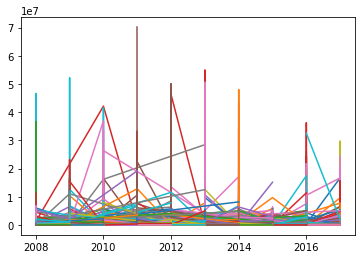

In [41]:
#Creating a list of artists

artists = ny_df['artist'].unique()

#Removing entries that didn't sell
ny_df_sales = ny_df[ny_df['adj_sale_price'] != 0]

#Creating a time series for each artist by year

for artist in artists:
    artist_df = ny_df_sales.loc[ny_df_sales['artist'] == artist]
    line = plt.plot(artist_df['year'], artist_df['adj_sale_price'], label=artist)


This isn't quite proper because the adj_sale_price column is not summed properly per year: will be trying to do that further down but it still shows a general picture of the sales per year that particular artists will have. This indicates that there are some standout artists that sell for very high prices at times, while other artists tend to clump towards less extreme prices. Another way to see trends more clearly may be to visualize the auction appearances and/or the cumulative value of sales for an artist over time.

In [39]:
#testing plots/methods on a single artist

testdf = ny_df.loc[ny_df['artist'] == 'ANNA TICHO']
testdfprice = testdf.groupby('adj_sale_price').size()
testdfyear = testdf.groupby('year').size()
testdfprice
#plt.plot(testdfyear.index, testdfprice.index)

adj_sale_price
0.00        7
5475.70     1
8060.54     1
19205.27    1
24692.50    1
dtype: int64

In [13]:
#counting number of sales per year by artist
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()

for artist in artists:
    year_df = ny_df.loc[ny_df['artist'] == artist]
    year_df = year_df.groupby('year').size()
    fig.add_traces(go.Scatter(x=year_df.index, y=year_df.values, mode='lines', name=artist))

#fig.show() 




KeyboardInterrupt: 

Pretty messy and plotly gets very laggy with so many lines but this indicates again that there are lots some artists that have years where they will appear hundreds of times in auctions, while other artists will appear only a few times. 

Another point of analysis could be finding how many upward trending vs. downward trending artists there are.

Finding the cumulative value of sales per year should help with that.

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

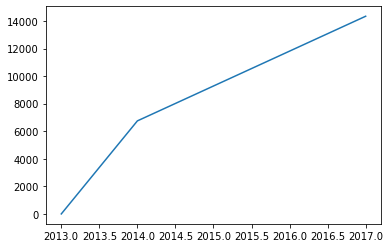

In [29]:
#plotting the cumulative value of sales per year by artist
# fig = go.Figure()

# for artist in artists:
#     artist_df = ny_df.loc[ny_df['artist'] == artist]
#     years = artist_df.groupby('year').size()
#     sales = artist_df.groupby('adj_sale_price').sum()
#     plt.plot(years.index, sales.index)
    #fig.add_traces(go.Scatter(x=years.index, y=sales.index, mode='lines', name=artist))